In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
# get all the tables from the wikipedia page 'https://en.wikipedia.org/wiki/Nasdaq-100#Components' and write them to a pandas dataframe called WikipediaDTs
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
WikipediaDTs = pd.DataFrame()
WikipediaDTs = pd.read_html(nasdaq)
print(len(WikipediaDTs)) # this will tell us how many tables there are on the page
print(WikipediaDTs)

18
[                                     0  \
0   Nasdaq-100 Index from 1985 to 2015   
1                           Foundation   
2                             Operator   
3                            Exchanges   
4                       Trading symbol   
5                         Constituents   
6                                 Type   
7                           Market cap   
8                     Weighting method   
9                      Related indices   
10                             Website   

                                          1  
0        Nasdaq-100 Index from 1985 to 2015  
1            January 31, 1985; 40 years ago  
2                              Nasdaq, Inc.  
3                                    Nasdaq  
4                               ^NDX or NDX  
5                                       101  
6                                 Large-cap  
7   US$26 trillion (as of December 2024)[1]  
8        Free-float capitalization-weighted  
9                      Nasdaq F

To work out which table has the names and tickers, we can simply cycle through them manually (it's like opening x-mas pressies)

In [4]:
print(WikipediaDTs[4]) # this isn't it!

                     Company Symbol             GICS Sector  \
0                 Adobe Inc.   ADBE  Information Technology   
1     Advanced Micro Devices    AMD  Information Technology   
2                     Airbnb   ABNB  Consumer Discretionary   
3    Alphabet Inc. (Class A)  GOOGL  Communication Services   
4    Alphabet Inc. (Class C)   GOOG  Communication Services   
..                       ...    ...                     ...   
96    Vertex Pharmaceuticals   VRTX             Health Care   
97    Warner Bros. Discovery    WBD  Communication Services   
98             Workday, Inc.   WDAY  Information Technology   
99               Xcel Energy    XEL               Utilities   
100                  Zscaler     ZS  Information Technology   

                  GICS Sub-Industry  
0              Application Software  
1                    Semiconductors  
2    Hotels, Resorts & Cruise Lines  
3      Interactive Media & Services  
4      Interactive Media & Services  
..             

In [5]:
ben = WikipediaDTs[4] # here it is!
ben

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


In [6]:
# now we need to get the tickers from the table and put them in a list called tickersLIST
tickersLIST = WikipediaDTs[4]['Symbol'].tolist() # this is a list
tickersLIST

['ADBE',
 'AMD',
 'ABNB',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'APP',
 'ARM',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'ADP',
 'AXON',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MSTR',
 'MDLZ',
 'MDB',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PLTR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SBUX',
 'SNPS',
 'TTWO',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

In [7]:
#download from yahoo finance the historical data for all tickers in the list and put it in a single dataframe called hPricesDT
hPricesDT = pd.DataFrame()
hPricesDT = yf.download(tickersLIST, start='2010-07-01', end='2021-06-30')['Close']
hPricesDT

[*********************100%***********************]  101 of 101 completed

4 Failed downloads:
['ARM', 'GEHC', 'CEG', 'GFS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1277956800, endDate = 1625025600")')


Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TSLA,TTD,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.485881,NaN,26.660000,19.909473,24.783224,24.570000,18.454435,9.443215,7.390000,36.582802,...,1.464000,NaN,8.850000,15.796400,29.060026,32.299999,18.441492,NaN,12.590261,NaN
2010-07-02,7.439484,NaN,26.730000,19.873823,24.608471,24.309999,18.551805,9.443215,7.170000,36.357758,...,1.280000,NaN,9.010000,15.755496,28.992674,32.220001,18.083801,NaN,12.645211,NaN
2010-07-06,7.490401,NaN,26.340000,19.888079,24.595993,24.049999,19.050108,9.270093,7.040000,36.076450,...,1.074000,NaN,8.910000,15.762309,28.915691,32.169998,18.206438,NaN,12.797859,NaN
2010-07-07,7.792867,NaN,26.790001,20.993374,25.095270,24.730000,19.685881,9.592735,7.390000,36.146782,...,1.053333,NaN,9.750000,16.532701,28.463432,33.040001,18.533470,NaN,13.048198,NaN
2010-07-08,7.775395,NaN,26.850000,20.736650,25.195131,24.610001,19.914988,9.529780,7.370000,36.730465,...,1.164000,NaN,9.390000,16.512257,28.299850,33.799999,18.564129,NaN,13.188635,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.156998,151.580002,574.229980,153.719055,181.660370,283.670013,72.486420,131.538193,83.820000,213.632736,...,218.856674,65.389999,171.880005,167.392502,167.994278,187.520004,29.510000,238.690002,59.181759,218.860001
2021-06-24,130.872513,150.729996,578.260010,156.922455,182.451248,286.959991,72.661835,134.217468,86.099998,215.637421,...,226.606674,75.879997,175.059998,169.650192,169.569519,191.940002,30.320000,241.710007,59.208572,219.639999
2021-06-25,130.578201,149.669998,579.659973,157.504959,183.642303,288.739990,74.345711,132.208008,85.620003,217.185669,...,223.956665,76.019997,173.820007,169.254395,170.929520,194.339996,30.860001,243.000000,59.959179,218.839996


In [8]:
# identify any tickers with NaN values and list them in a list called tickersNaN
tickersNaN = []
for ticker in tickersLIST:
    if hPricesDT[ticker].isnull().values.any() == True:
        tickersNaN.append(ticker)
hPricesDT.drop(tickersNaN, axis=1, inplace=True) # drop the tickers with NaN values from the dataframe hPricesDT


hPricesDT

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SBUX,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.485881,26.660000,19.909473,24.783224,24.570000,18.454435,9.443215,7.390000,36.582802,5.548000,...,9.491851,20.639999,13.706388,1.464000,8.850000,15.796400,29.060026,32.299999,18.441492,12.590261
2010-07-02,7.439484,26.730000,19.873823,24.608471,24.309999,18.551805,9.443215,7.170000,36.357758,5.457000,...,9.372529,20.510000,13.495021,1.280000,9.010000,15.755496,28.992674,32.220001,18.083801,12.645211
2010-07-06,7.490401,26.340000,19.888079,24.595993,24.049999,19.050108,9.270093,7.040000,36.076450,5.503000,...,9.087692,20.459999,13.543798,1.074000,8.910000,15.762309,28.915691,32.169998,18.206438,12.797859
2010-07-07,7.792867,26.790001,20.993374,25.095270,24.730000,19.685881,9.592735,7.390000,36.146782,5.671500,...,9.391776,21.480000,14.064087,1.053333,9.750000,16.532701,28.463432,33.040001,18.533470,13.048198
2010-07-08,7.775395,26.850000,20.736650,25.195131,24.610001,19.914988,9.529780,7.370000,36.730465,5.811000,...,9.561133,21.410000,14.649416,1.164000,9.390000,16.512257,28.299850,33.799999,18.564129,13.188635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.156998,574.229980,153.719055,181.660370,283.670013,72.486420,131.538193,83.820000,213.632736,175.190994,...,103.170769,268.859985,142.300354,218.856674,171.880005,167.392502,167.994278,187.520004,29.510000,59.181759
2021-06-24,130.872513,578.260010,156.922455,182.451248,286.959991,72.661835,134.217468,86.099998,215.637421,172.453995,...,103.568428,273.799988,142.859650,226.606674,175.059998,169.650192,169.569519,191.940002,30.320000,59.208572
2021-06-25,130.578201,579.659973,157.504959,183.642303,288.739990,74.345711,132.208008,85.620003,217.185669,170.072998,...,104.539467,268.970001,142.604523,223.956665,173.820007,169.254395,170.929520,194.339996,30.860001,59.959179


In [9]:
print (tickersNaN)

['ABNB', 'APP', 'ARM', 'TEAM', 'CDW', 'CEG', 'CRWD', 'DDOG', 'FANG', 'DASH', 'GEHC', 'GFS', 'KHC', 'META', 'MDB', 'NXPI', 'PLTR', 'PANW', 'PYPL', 'PDD', 'TTD', 'WDAY', 'ZS']


In [10]:
# set signal period and convert to timestamps
signal_start_date = '2015-07-01'
print(signal_start_date)
signal_start_date = pd.Timestamp(signal_start_date)
print(signal_start_date)

# set signgal_end_date to be 1 year after signal_start_date
signal_end_date = signal_start_date + pd.DateOffset(years=1) + pd.DateOffset(days=-1)
print(signal_end_date)

# create a dataframe called signalDT that contains the prices for the signal period
signalDT = pd.DataFrame()
signalDT = hPricesDT[signal_start_date:signal_end_date]
print(hPricesDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# convert the prices to index values and put them in a dataframe called signalIndexDT
signalIndexDT = pd.DataFrame()
signalIndexDT = signalDT / signalDT.iloc[0]
print(signalIndexDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# reset the signal dates to the first and last dates in the signalIndexDT dataframe index (noting that holidays and weekends will be skipped)
signal_start_date = signalIndexDT.index[0]
signal_end_date = signalIndexDT.index[-1]
print(signal_start_date)
print(signal_end_date)
print(signalIndexDT[signal_end_date:signal_end_date]['AAPL'])


2015-07-01
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2015-06-26    28.456280
2015-06-29    27.957865
2015-06-30    28.159925
2015-07-01    28.422602
2015-07-02    28.386684
2015-07-06    28.287895
Name: AAPL, dtype: float64
Date
2015-07-01    1.000000
2015-07-02    0.998736
2015-07-06    0.995261
Name: AAPL, dtype: float64
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2016-06-30    0.770596
Name: AAPL, dtype: float64


In [11]:
# create a list of the 5 tickers with the highest index numbers at the end of the period
top5 = signalIndexDT.iloc[-1].nlargest(5).index.tolist()

# create a list of the 5 tickers with the lowest index numbers at the end of the period
bottom5 = signalIndexDT.iloc[-1].nsmallest(5).index.tolist()

# create a list of the other tickers
otherTickers = signalIndexDT.columns.tolist()
for ticker in top5:
    otherTickers.remove(ticker)
for ticker in bottom5:
    otherTickers.remove(ticker)

top5, bottom5, otherTickers


(['NVDA', 'AMD', 'AMZN', 'IDXX', 'XEL'],
 ['BIIB', 'VRTX', 'REGN', 'GILD', 'MU'],
 ['AAPL',
  'ADBE',
  'ADI',
  'ADP',
  'ADSK',
  'AEP',
  'AMAT',
  'AMGN',
  'ANSS',
  'ASML',
  'AVGO',
  'AXON',
  'AZN',
  'BKNG',
  'BKR',
  'CCEP',
  'CDNS',
  'CHTR',
  'CMCSA',
  'COST',
  'CPRT',
  'CSCO',
  'CSGP',
  'CSX',
  'CTAS',
  'CTSH',
  'DXCM',
  'EA',
  'EXC',
  'FAST',
  'FTNT',
  'GOOG',
  'GOOGL',
  'HON',
  'INTC',
  'INTU',
  'ISRG',
  'KDP',
  'KLAC',
  'LIN',
  'LRCX',
  'LULU',
  'MAR',
  'MCHP',
  'MDLZ',
  'MELI',
  'MNST',
  'MRVL',
  'MSFT',
  'MSTR',
  'NFLX',
  'ODFL',
  'ON',
  'ORLY',
  'PAYX',
  'PCAR',
  'PEP',
  'QCOM',
  'ROP',
  'ROST',
  'SBUX',
  'SNPS',
  'TMUS',
  'TSLA',
  'TTWO',
  'TXN',
  'VRSK',
  'WBD'])

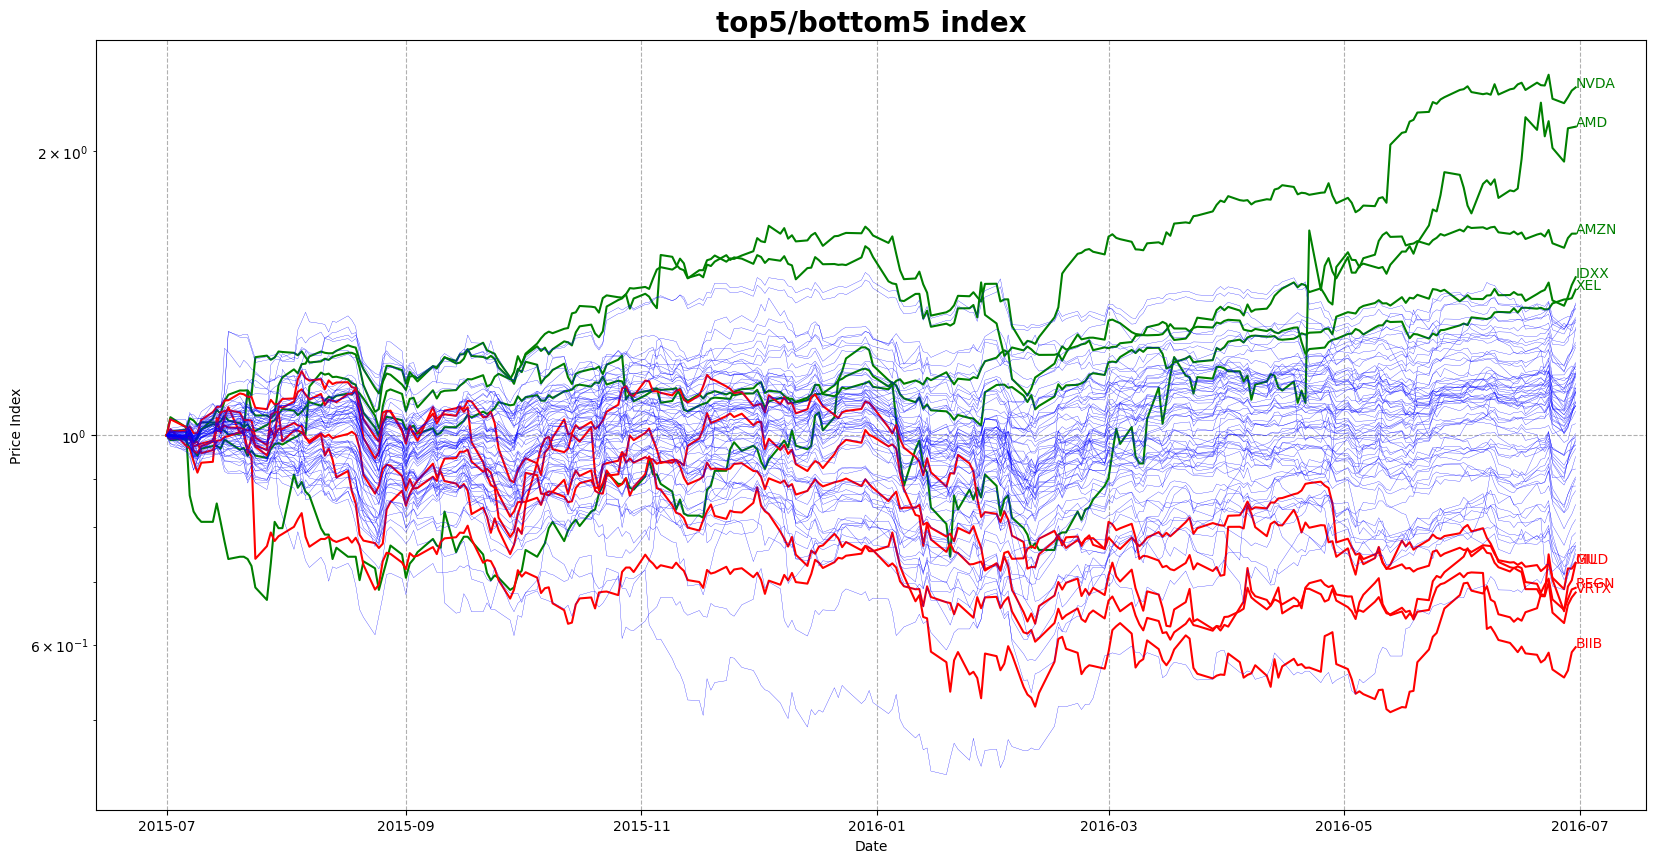

In [12]:
# plot the index for all tickers in the dataframe hPricesIDX
plt.figure(figsize=(20,10))
for ticker in top5:
    plt.plot(signalIndexDT[ticker], color='green')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='green')
for ticker in bottom5:
    plt.plot(signalIndexDT[ticker], color='red')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='red')
for ticker in otherTickers:
    plt.plot(signalIndexDT[ticker], color='blue', linewidth='0.2')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('top5/bottom5 index', fontsize=20, fontweight='bold')
# use a log scale for the y axis
plt.yscale('log')
# plot gridlines
plt.grid(which='major', axis='both', linestyle='--')


plt.show()


In [13]:
#set up long portfolio
opening_portfolio_value = 1000000

# create a list of the prices in hPricesDT for top5
top5Prices = []
top5Prices = signalDT.iloc[-1][top5].tolist()
print(top5Prices)

# set top5Weights to be the portfolio size divided by the prices in top5Prices
top5shareCount = []
top5shareCount = opening_portfolio_value / 5 / np.array(top5Prices)


#hPricesDT.iloc[signal_end_index][top5]
longPORTinput = {'Ticker': top5, 'Price': top5Prices, 'ShareCount': top5shareCount}
longPORT = pd.DataFrame(longPORTinput)
# set the index of longPORT to be the tickers
longPORT.set_index('Ticker', inplace=True)
longPORT


# check the opening value of the portfolio
currentValue = longPORT['Price'] * longPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

longPORT


[1.1541770696640015, 5.139999866485596, 35.78099822998047, 92.86000061035156, 34.52269744873047]
Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
NVDA,1.154177,173283.636676
AMD,5.140000,38910.506847
AMZN,35.780998,5589.558981
IDXX,92.860001,2153.779870
XEL,34.522697,5793.290061


In [14]:
bottom5Prices = []
bottom5Prices = signalDT.iloc[-1][bottom5].tolist()
bottom5shareCount = []
bottom5shareCount = opening_portfolio_value / 5 / np.array(bottom5Prices)
shortPORTinput = {'Ticker': bottom5, 'Price': bottom5Prices, 'ShareCount': bottom5shareCount}
shortPORT = pd.DataFrame(shortPORTinput)
shortPORT.set_index('Ticker', inplace=True)

# check the opening value of the portfolio
currentValue = shortPORT['Price'] * shortPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

shortPORT

Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
BIIB,241.820007,827.061426
VRTX,86.019997,2325.040779
REGN,349.230011,572.688468
GILD,60.918331,3283.084028
MU,13.469589,14848.262745


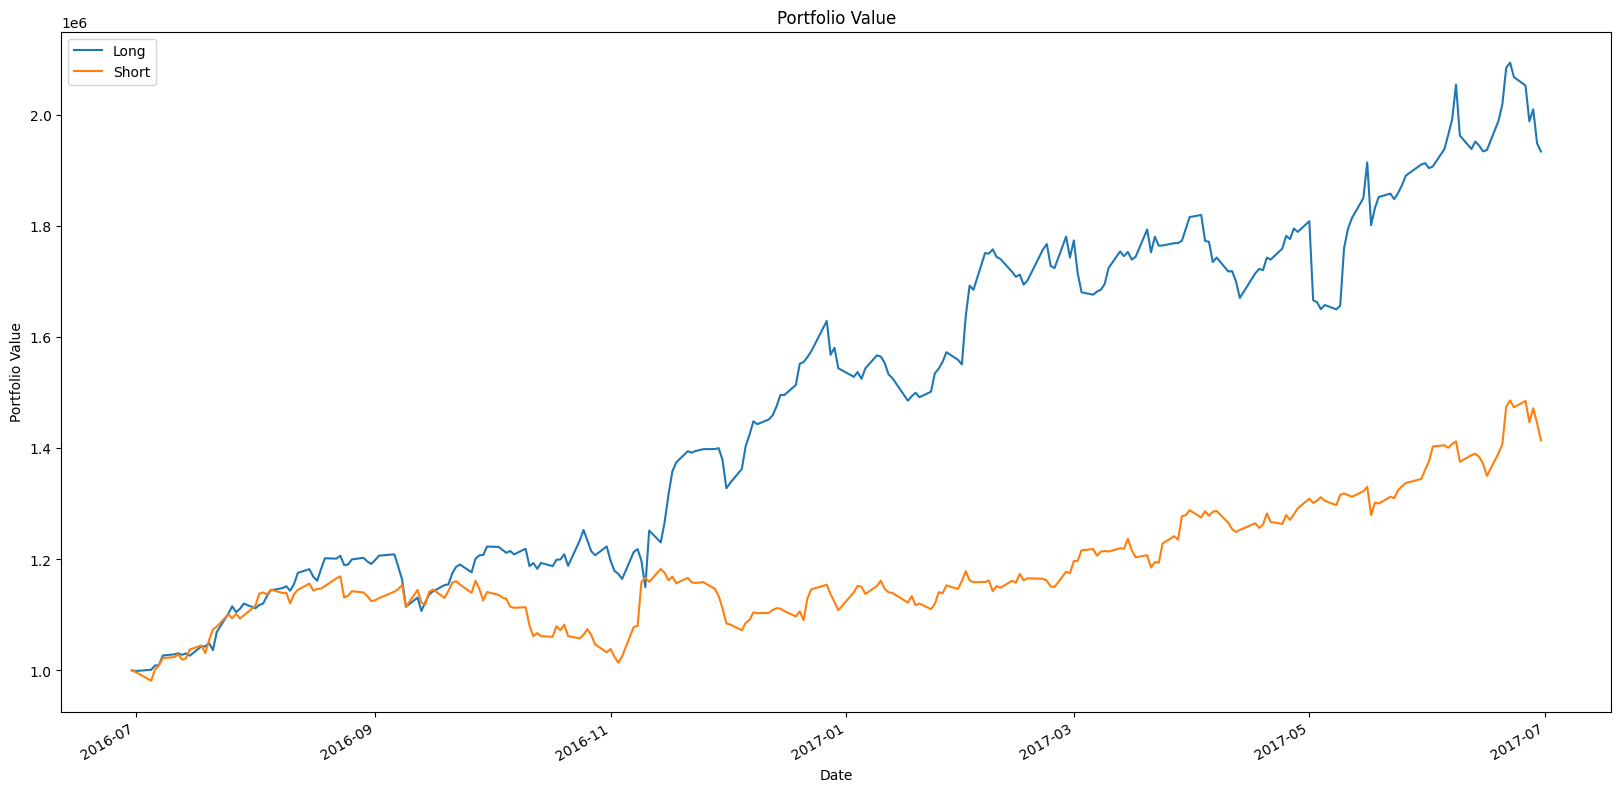

In [15]:
# define trading_start_date and tranding_end_date
trading_start_date = signal_end_date
# set trading_end_date to be 1 year after trading_start_date
trading_end_date = trading_start_date + pd.DateOffset(years=1)

# calculate portfolio values during the trading period
longPORT_values = hPricesDT[trading_start_date:trading_end_date][top5]*longPORT['ShareCount']
shortPORT_values = hPricesDT[trading_start_date:trading_end_date][bottom5]*shortPORT['ShareCount']

#chart the performance of the long and short portfolios
longPORT_values['Total'] = longPORT_values.sum(axis=1)
shortPORT_values['Total'] = shortPORT_values.sum(axis=1)
longPORT_values['Total'].plot(figsize=(20,10))
shortPORT_values['Total'].plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value')
plt.legend(['Long', 'Short'])
